<a href="https://colab.research.google.com/github/koushik-sivan/Predicting_Number_Of_Car_Rentals/blob/main/Koushik_Predicting_Number_Of_Car%20Rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression 1

**Agenda:**

<ul>
  <li>Use Case: Car Resale Price Prediction using Linear Regression</li>
  <li>Data Exploration</li>
  <li>Linear Regression Introduction</li>
  <li>Hypothesis in Linear Regression</li>
<ul>
  <li>Cost Function</li>
  <li>Feedback</li>
  <li>Gradient Decent</li>
</ul>
  <li>Use Case Simulation</li>
  <li>Metrices for Evaluation Regression Models</li>
  <li>Stochastic Gradient Descent</li>
  <li>Mini Batch Gradient Descent</li>
  <li>Linear Regession using Scikit-Learn</li>
</ul>

## Use Case: Car Resale Price Prediction using Linear Regression

**Introduction:**

In this case study, we aim to predict the resale price of cars based on various features using the Linear Regression model. The data set consists of information about different cars, including attributes such as selling price, year, kilometers driven, engine capacity, max power, make, model, transmission type, and various other features.

**Objective:**

The primary objective is to build a predictive model that can accurately estimate the resale price of a car based on its characteristics. This model can be valuable for both buyers and sellers in the used car market, providing insights into the factors influencing resale prices.

## Data Exploration:

[Download Dataset From Here](https://drive.google.com/drive/folders/1qtfW3ie-GaLPovL-8oesW_m-VHzzYIG1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#  importing the "drive" module from the "google.colab" library, facilitating access to Google Drive within a Colab notebook.
from google.colab import drive

In [ ]:
# mounting the user's Google Drive to the "/content/drive" directory in a Google Colab notebook, enabling access to files and data stored on Google Drive within the Colab environment.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading a CSV file named "data.csv" located in the "Data" folder on the your Google Drive and stores it as a DataFrame df
# write your data file path
df = pd.read_csv('/content/drive/MyDrive/DSML Course/Introduction to ML/2 Data Sets/Linear Regression 1 Dataset/CarPred.csv')

<ul>
  <li>selling_price: Integer representing the selling price of the car in lakhs.</li>
  <li>year: Integer representing the manufacturing year of the car</li>
  <li>km_driven: Integer representing the number of kilometers driven by the car.</li>
  <li>engine: Integer representing the engine capacity of the car.</li>
  <li>max_power: Integer representing the maximum power of the car.</li>
  <li>make: String representing the brand of the car (e.g., suzuki, maruti, honda).</li>
  <li>model: String representing the model of the car (e.g., swift, baleno, city).</li>
  <li>transmission_type: Binary variable (0 or 1) representing the transmission type of the car.</li>
  <li>seats_cop: Binary variable (0 or 1) representing the presence of cop seats.</li>
  <li>seats_family: Binary variable (0 or 1) representing the presence of family seats</li>
  <li>seats_large: Binary variable (0 or 1) representing the presence of large seats.</li>
  <li>fuel_cng, fuel_diesel, fuel_electric, fuel_lpg, fuel_patrol: Binary variables (0 or 1) representing the fuel type of the car.</li>
  <li>seller_dealer: Binary variable (0 or 1) representing whether the seller is a dealer.</li>
  <li>seller_self: Binary variable (0 or 1) representing whether the seller is an individual.</li>
</ul>

Number of Rows: 1,000 rows.

In [ ]:
df.head()

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299


In [ ]:
df.shape

(20000, 18)

**What type of problem is this and why?**

Supervised or unsupervised

**What type of objective is this and why?**

Classification or Regression

## Linear Regression Introduction

<ul>
  <li>Linear Regression is a statistical method used in machine learning and statistics to model the relationship between a dependent variable (also known as the target or response variable) and one or more independent variables (also known as predictors or features). </li>
  <li>The primary goal of linear regression is to find the best-fit line that represents the linear relationship between the variables.</li>
  <li>In Simple Linear Regression, there is only one independent variable, and the relationship is modeled with a straight line equation: Y = β<sub>0</sub> + β<sub>1</sub>⋅X
    
<ul>
  <li>Y represents the dependent variable.</li>
  <li>X represents the independent variable.</li>
  <li>β<sub>0</sub> is the intercept, the value of Y when X is zero.</li>
  <li>β<sub>1</sub> is the slope, indicating the change in Y for a one-unit change in X.</li>
  </ul>
  </li>
  <li>The goal is to estimate the coefficients β<sub>0</sub>
  and β<sub>1</sub> such that the sum of squared differences between the predicted values and the actual values (residuals) is minimized. Once the model is trained, it can be used to predict the dependent variable's values for new, unseen data.</li>
  
  <li>In Multiple Linear Regression, the same principles are applied, but there are multiple independent variables: Y = β<sub>0</sub> + β<sub>1</sub>⋅X + β<sub>2</sub>⋅X + … + β<sub>n</sub>⋅X
  </li>

  ![picture](https://drive.google.com/uc?export=view&id=17ejqpK9puRyprtE_EV96_Gkbe9OVvS_J)

  ![picture](https://drive.google.com/uc?export=view&id=1gsqA1SlkKwoihHfXpBG6zi7PuNYLg51d)


  <li>Linear Regression is widely used for tasks such as predicting sales, stock prices, and various other real-world phenomena where understanding and quantifying the relationship between variables are essential.</li>
</ul>

The use case for linear regression in this scenario is justified by the nature of the problem and the characteristics of the data.

<ul>
  <li>The goal is to predict the resale price of cars (target variable: selling price).</li>
  <li>The problem involves predicting a continuous numeric variable, which aligns with the characteristics of a regression problem.</li>
</ul>

<ul>
  <li>Single Input Variable:</li>
<ul>
  <li>For simplicity and as a starting point, the analysis focuses on a single input variable, max power.</li>
  <li>Simple Linear Regression is chosen due to having only one predictor variable initially.</li>
</ul>
</ul>

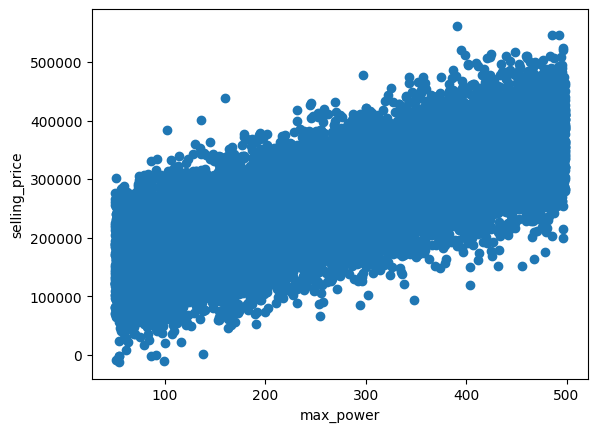

In [ ]:
#define x and y
x = df["max_power"].values
y = df["selling_price"].values

plt.scatter(x, y)
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.show()

<ul>
  <li>Linear Relationship Assumption:</li>
<ul>
  <li>Linear regression assumes that the relationship between the input variable (max power) and the target variable (selling price) can be represented by a straight line.</li>
  <li>Exploratory Data Analysis (EDA), including the examination of a scatter plot and correlation analysis, supports the assumption that there is a linear or closely linear relationship between max power and selling price.</li>
</ul>
</ul>

## Assumptions in Linear Regression

Linear regression is a fundamental statistical technique used to model the relationship between a dependent variable and one or more independent variables.

When performing linear regression, there are several key assumptions that must be satisfied for the model to be valid.

Here's a detailed overview of these assumptions:

![picture](https://drive.google.com/uc?export=view&id=1nHW3JMlwD3vT5gyDBYQd79iZXyiJq6WN)

### Linearity

The relationship between the independent variable(s) and the dependent variable is linear. This means that the change in the dependent variable is proportional to the change in the independent variable(s), with a constant rate of change.

#### Simulation for Linearity

In [ ]:
# Fit linear regression model
X = df[['year', 'km_driven', 'engine', 'max_power', 'transmission_type', 'seats_cop', 'seats_family', 'seats_large', 'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_patrol', 'fuel_lpg', 'fuel_electric', 'seller_dealer', 'seller_self']]
y = df['selling_price']

In [ ]:
import statsmodels.api as sm
# Add a constant term for intercept
X_with_const = sm.add_constant(X)

In [ ]:
# Fit linear regression model
model = sm.OLS(y, X_with_const).fit()

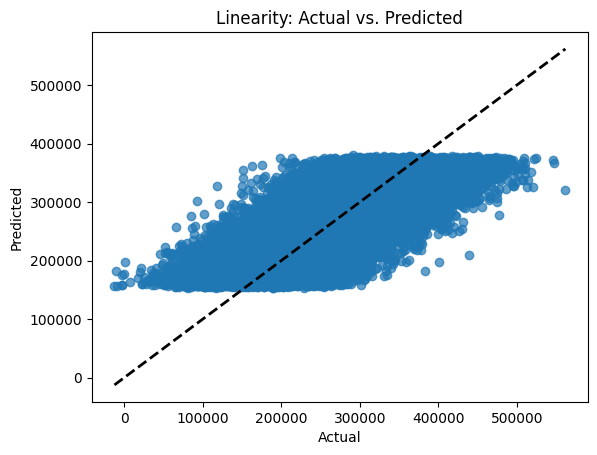

In [ ]:
# Check linearity assumption by plotting actual vs. predicted values
plt.scatter(y, model.predict(), alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linearity: Actual vs. Predicted')
plt.show()

By visually inspecting the scatter plot of actual versus predicted values, We can assess whether our linear regression model follows the linearity assumption.

If the points form a reasonably straight line, it suggests that the assumption holds, whereas nonlinear patterns may indicate violations of the linearity assumption.

### Homoscedasticity

Also known as constant variance, this assumption states that the variance of the errors is constant across all levels of the independent variables. In practical terms, this means that the spread of the residuals should remain approximately the same as the predicted values increase. A violation of this assumption results in heteroscedasticity.

#### Simulation for Homoscedasticity

In [ ]:
# Check homoscedasticity by plotting residuals vs. predicted values
residuals = model.resid

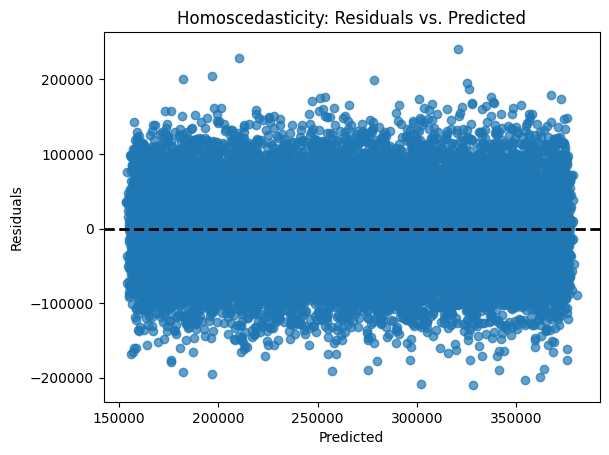

In [ ]:
plt.scatter(model.predict(), residuals, alpha=0.7)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Residuals vs. Predicted')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.show()

To assess homoscedasticity based on the plot of residuals versus predicted values, you'll need to interpret the patterns and characteristics of the scatter plot.

Here's how you can evaluate homoscedasticity using the plot:

<ol>
  <li>Equal Spread of Residuals: Homoscedasticity implies that the spread (variance) of the residuals remains approximately constant across all levels of the predicted values. In the scatter plot, look for a consistent spread of points around the horizontal line representing zero residual (the dashed line in the plot).</li>
  <li>No Clear Patterns or Trends: Ideally, the scatter plot should not exhibit any discernible pattern or trend as you move along the predicted values. There should be no systematic increase or decrease in the spread of residuals. Instead, the points should be randomly scattered around the zero residual line.</li>
  <li>Consistent Residuals Across Predicted Values: Check whether the dispersion of residuals remains relatively constant across the range of predicted values. In other words, the variability of residuals should not systematically change as the predicted values increase or decrease.</li>
  <li>Heteroscedasticity: If the scatter plot displays a funnel-shaped pattern or if the spread of residuals widens or narrows systematically with the predicted values, it suggests heteroscedasticity, which violates the homoscedasticity assumption.</li>
</ol>

Based on the plot generated by above simulation, you can evaluate whether your dataset follows the homoscedasticity assumption by examining these characteristics. If the scatter plot shows a consistent spread of residuals around the zero line with no clear pattern or trend, it suggests that the data satisfies the homoscedasticity assumption. However, if you observe a non-constant spread or any systematic pattern in the residuals, it may indicate potential violations of homoscedasticity, requiring further investigation and possibly model refinement.

### Normality of Errors

The errors (residuals) of the model are normally distributed. This means that if you were to plot the distribution of residuals, it should resemble a bell curve or Gaussian distribution. While this assumption is not strictly necessary for large sample sizes (thanks to the Central Limit Theorem), it can be important for smaller sample sizes to ensure the validity of statistical tests and confidence intervals.

#### Simulation for Normality of Errors

To assess the normality of errors based on the histogram of residuals, you'll need to interpret the shape and distribution of the histogram.

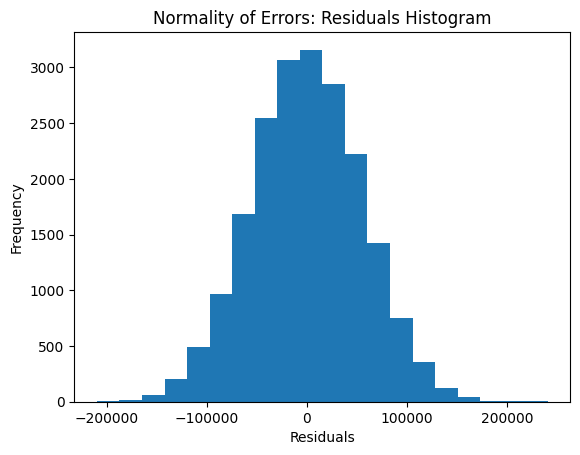

In [ ]:
# Check normality of errors by plotting a histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Errors: Residuals Histogram')
plt.show()

Based on the histogram generated by the simulation, you can evaluate whether your dataset follows the normality of errors assumption by examining these characteristics.

If the histogram exhibits a roughly bell-shaped curve with a single peak and comparable frequencies in each bin, it suggests that the residuals are approximately normally distributed.

However, if the histogram shows significant deviations from these patterns, it may indicate potential violations of the normality assumption, requiring further investigation and possibly transformation of the data.

### No Autocorrelation

In the context of time series data or any data with a sequential ordering, this assumption states that the residuals are not correlated with each other. Autocorrelation occurs when the residuals from one observation are correlated with the residuals from nearby observations. This violates the assumption of independent errors and can lead to biased parameter estimates and incorrect statistical inference.

#### Simulation for No Autocorrelation


The Durbin-Watson statistic is a test used to detect the presence of autocorrelation in the residuals of a regression model.

In [ ]:
# Check independence of errors using Durbin-Watson test (DW statistic)
durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic:", durbin_watson)

Durbin-Watson statistic: 2.01352969275313


The test statistic ranges from 0 to 4, with values close to 2 indicating no significant autocorrelation.

Based on the Durbin-Watson statistic generated by the simulation, you can evaluate whether your dataset follows the assumption of no autocorrelation.

If the Durbin-Watson statistic is close to 2 (typically between 1.5 and 2.5), it suggests that there is no significant autocorrelation in the residuals, indicating that the assumption of independence of errors is met.

However, if the statistic deviates substantially from 2, it may indicate the presence of autocorrelation, requiring further investigation and possibly model adjustments.

### No Perfect Multicollinearity

In multiple linear regression (where there are more than one independent variable), there should be no perfect linear relationship between the independent variables. Perfect multicollinearity occurs when one independent variable can be exactly predicted from another independent variable or a combination of other independent variables. This situation makes it impossible to estimate the unique effect of each independent variable on the dependent variable.

#### Simulation for No Perfect Multicollinearity

<ul>
  <li>The Variance Inflation Factor (VIF) is a statistical tool used in regression analysis to detect and measure the severity of multicollinearity. </li>
  </li>Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. </li>
  <li>This can lead to several problems, including:</li>
<ul>
  <li>Inflated variances of the regression coefficients: This makes it difficult to accurately estimate the true effect of each independent variable on the dependent variable.</li>
  <li>Unreliable coefficient estimates: Even if the coefficients are statistically significant, they may not be reliable enough to draw meaningful conclusions.</li>
  <li>Instability of the model: Small changes in the data can lead to large changes in the estimated coefficients.</li>
</ul>
</ul>

The VIF calculates how much the variance of a regression coefficient is inflated due to multicollinearity. It is calculated for each independent variable in the model. A VIF value of 1 indicates no multicollinearity, while values greater than 1 indicate some degree of multicollinearity. The higher the VIF value, the more severe the multicollinearity.

Here are some general guidelines for interpreting VIF values:

<ul>
  <li>VIF < 5: No multicollinearity issue.</li>
  <li>5 ≤ VIF < 10: Moderate multicollinearity, may not be a major problem.</li>
  <li>VIF ≥ 10: Severe multicollinearity, investigate further and consider remedial actions.</li>
</ul>

It is important to note that these are just guidelines, and the decision of whether or not to take action to address multicollinearity will depend on the specific context of your analysis.

Here are some of the ways to address multicollinearity:

<ul>
  <li>Remove one or more of the collinear variables: This is the most common approach, but it should only be done if the variable(s) being removed are not theoretically important to the model.</li>
  <li>Combine collinear variables: If two or more variables are measuring the same underlying construct, they can be combined into a single variable.</li>
  <li>Use ridge regression or LASSO: These are regression techniques that can help to reduce the impact of multicollinearity on the coefficient estimates.</li>
</ul>

In [ ]:
# Check for multicollinearity using variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X_with_const.copy()
vif_data = vif_data.drop(columns='const')  # Exclude the constant term
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


             Variable        VIF
0                year  56.648571
1           km_driven   4.007914
2              engine   7.729838
3           max_power   5.478773
4   transmission_type   1.998263
5           seats_cop   2.010321
6        seats_family   3.019145
7         seats_large   5.036540
8            fuel_cng   1.994996
9         fuel_diesel   3.047902
10      fuel_electric        inf
11        fuel_patrol  17.090605
12           fuel_lpg   9.085081
13      fuel_electric        inf
14      seller_dealer   1.995045
15        seller_self   1.977211


It's important to note that while these assumptions provide a framework for building and interpreting linear regression models, real-world data often deviate from these ideal conditions. Therefore, it's crucial to assess the extent to which these assumptions are violated and consider techniques such as robust regression or transformations to address any issues. Additionally, diagnostic tests and visualizations can help evaluate the validity of these assumptions and guide model refinement.

## Hypothesis in Linear Regression

The hypothesis is a mathematical representation of the relationship between the input variable (X) and the output variable (Y).

The goal is to find a linear equation that best fits the given data, allowing us to make predictions or estimates about Y based on the value of X.

The general form of the hypothesis in linear regression is expressed as:

Y = Θ<sub>0</sub> + Θ<sub>1</sub>⋅X

where,

<ul>
  <li>Y: This is the dependent variable or the target variable that we want to predict. In the context of the example you provided, it could be the resale price of a car.</li>
  <li>X: This is the independent variable or the input feature. It represents the variable for which we have data and on which we base our predictions. In your example, it might be a feature like the maximum power of a car.</li>
  <li>Θ<sub>0</sub>: This is the y-intercept of the linear equation. It represents the value of Y when X is 0. In other words, it's the baseline value of Y.</li>
  <li>Θ<sub>1</sub>: This is the slope of the line. It represents the change in Y for a unit change in X. In the context of your example, it indicates how much the resale price is expected to change for each unit increase in maximum power.</li>
</ul>

The linear regression model aims to find the values of Θ<sub>0</sub> and Θ<sub>0</sub>  that minimize the difference between the predicted values (Y<sup>^</sup>) and the actual values of Y in the training data set. This process is often referred to as training the model.

![picture](https://drive.google.com/uc?export=view&id=1IQS9Es_EUolxQxXAh0rPj47r7_ZIf09w)

Once the model is trained, you can use it to predict the values of Y for new or unseen values of X. The linear equation provides a straight-line approximation of the relationship between the input and output variables. The goal is to have a line that best fits the data points in a way that it can generalize well to make accurate predictions for new data.

### Cost Function



The cost function is a measure of how well the model is performing, and it helps in quantifying the error between the predicted values and the actual values. The mean squared error (MSE) is a commonly used cost function in linear regression.

The mean squared error is calculated as the average of the squared differences between the predicted values (Y<sup>^</sup>​) and the actual values (Y) in the training dataset. The formula for the mean squared error is as follows:

![picture](https://drive.google.com/uc?export=view&id=1NVnxP4L8VwBK_4vro1UCQLCTOrxdjNgV)

<ul>
  <li>m: This represents the number of data points in the training dataset.</li>
  <li>Y<sub>hat</sub><sub>i</sub>: This is the predicted value of the dependent variable (Y) for the i-th data point based on the linear regression model.</li>
  <li>y<sub></sub>: This is the actual observed value of the dependent variable (Y) for the i-th data point.</li>
</ul>

The goal during the training of a linear regression model is to minimize the mean squared error.

In other words, we want to find the values of the parameters (Θ<sub>0</sub> and Θ<sub>1</sub> ) that lead to the smallest average squared difference between predicted and actual values.

Optimization algorithms, such as gradient descent, are often used to iteratively adjust the parameters and minimize the cost function.

When working with linear regression, we aim to find the best line that fits the training data. The cost function measures the difference between the predicted values of the model and the actual target values. By minimizing this cost function, we can determine the optimal values for the model's parameters and improve its performance.

![Gif of best fit line](https://drive.google.com/uc?export=view&id=1Gyw-h7VmuENBViTyvq8WizArTMJQv-RG)





### Feedback

In machine learning and linear regression, feedback refers to the process of using the information provided by the cost function to adjust the model parameters in order to minimize the error.

The feedback loop involves a continuous process of adjusting the model based on the information provided by the cost function. The model iteratively learns from its mistakes and refines its predictions. The feedback loop continues until the model parameters reach values that result in a minimal cost, indicating a well-performing model on the training data.

### Gradient Decent

Gradient Descent is an iterative optimization algorithm used to minimize a cost function or error in the context of machine learning. It's widely employed in various optimization problems, especially in training machine learning models. The process involves adjusting parameters iteratively to reach the optimal values that result in the minimum cost or error.

Process of Gradient Descent:

<ol>
  <li>Initialization:</li>
<ul>
  <li>Initialize the parameters (weights) randomly or with some predefined values.</li>
  <li>Choose a learning rate (α), which determines the step size in the parameter space.</li>
</ul>

  <li>Compute Cost Function:</li>
<ul>
  <li>Evaluate the cost function (or loss function) for the current parameter values.</li>
  <li>The cost function quantifies the difference between predicted values and actual values.</li>
</ul>

![picture](https://drive.google.com/uc?export=view&id=1fo4NplkAaqM8JB_LBD_dtgcb24fuza4C)

  <li>Compute Gradients:</li>
<ul>
  <li>Calculate the gradients of the cost function with respect to each parameter.</li>
  <li>Gradients indicate the direction and magnitude of the steepest increase of the function.</li>
</ul>

  <li>Update Parameters:</li>
<ul>
  <li>Adjust the parameters in the direction opposite to the gradients to reduce the cost.</li>
  <li>The update rule for each parameter θ is: θ = θ - α * (∂J/∂θ), where J is the cost function.</li>
</ul>

  <li>Iterate:</li>
<ul>
  <li>Repeat steps 2-4 until convergence or a predefined number of iterations.</li>
  <li>Convergence is often determined by observing a small change in the cost function or gradients below a threshold.</li>
</ul>

  <li>Learning Rate:</li>
<ul>
  <li>The learning rate (α) is crucial. A high learning rate may cause overshooting, while a low learning rate may slow down convergence.</li>
  <li>Learning rates are usually chosen through experimentation and optimization.</li>
</ul>

</ol>

![picture](https://drive.google.com/uc?export=view&id=1PeG5IcoZ7CiXjWDyW1RnjGbHNGWUvg2i)

Gradient Descent is a foundational concept in machine learning optimization, forming the basis for more advanced optimization algorithms used in deep learning and neural networks. Understanding its principles is crucial for effectively training models and solving various optimization problems.

#### Defining univariate_linear_hypothesis funtion

In [ ]:
# We are defining a function called univariate_linear_hypothesis.
# This function takes an input vector x and a list theta containing two values (Theta 0 and Theta 1).
# It calculates the predicted value (Y hat) using the univariate linear hypothesis equation: Y hat = Theta 0 + Theta 1 * x.

def univariate_linear_hypothesis(x, theta):
  y_hat = theta[0] + theta[1]*x
  return y_hat

#### Defining cost funtion

In [ ]:
# We need to define our cost function, and in this case, we are using the mean squared error as the cost function.
# The cost function takes input vectors X and Y, and a list theta containing two values (Theta 0 and Theta 1).
# It computes the predicted values (Y hat) using the univariate linear hypothesis and calculates the mean squared error.

def cost(X, Y , theta):
  m = X.shape[0] #number of training examples
  total_error = 0.0
  # Calculate the total error by summing up squared differences for each observation
  for i in range(m):
      y_hat = univariate_linear_hypothesis(X[i], theta)  # Compute Y hat using the linear hypothesis
      total_error += (y_hat - Y[i])**2  # Square of the difference (residual) for each observation

  # Calculate and return the mean squared error
  return total_error / m


Before we delve into the intricacies of gradient descent, let's take a moment to understand how it operates in practical terms.

We are creating a simple convex function y = (x-5)^2 to demonstrate the concept of gradient descent. The minimum value of this function occurs at x = 5, where the cost is zero.

We will visualize this convex function using a plot and then demonstrate how the gradient descent approach can be used to find the minimum point of the function.

#### Creating simple convex funtion

<ipython-input-174-7d77c578fe52>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


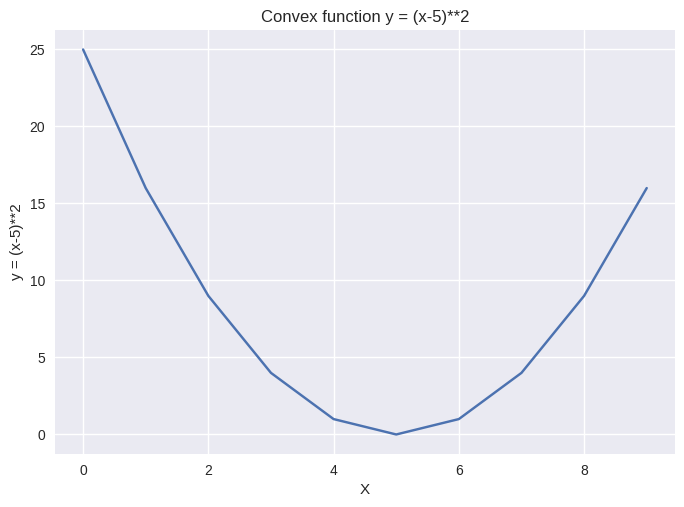

In [ ]:
# We are creating a simple convex function y = (x-5)^2.
# Our goal is to visualize this function and demonstrate how the gradient descent approach works.

# Create some random data for X values
X = np.arange(10)

# Define the convex function y = (x-5)^2
Y = (X-5)**2  # X = 5, cost function will give minimum (0)

# Plot the convex function
plt.style.use("seaborn")
plt.plot(X, Y)
plt.xlabel("X")
plt.ylabel("y = (x-5)**2")
plt.title("Convex function y = (x-5)**2")
plt.show()

Above code creates a simple convex function and visualizes it using Matplotlib. The plot shows a smooth, U-shaped curve, and the minimum point occurs at X = 5 where the cost is zero.

![picture](https://drive.google.com/uc?export=view&id=1IXNI_me2ic2fJHJ6Tp1tUITBDEAuynIA)

<ul>
  <li>If we initialize our variable X to 0, the initial cost function value (f(x)) would be 25.</li>
  <li>The update rule for X (X1) using the gradient is X1 = X0 - 2 * (X0 - 5), where the gradient of the cost function f(x) = (X - 5)^2 is 2 * (X - 5).</li>
  <li> If we directly use the gradient without considering the learning rate, it might lead to large steps in the parameter space. This could cause the algorithm to overshoot the minimum point and oscillate or diverge.</li>
  <li>Especially in the case of non-smooth convex surfaces, taking large steps without a learning rate could make it challenging for the algorithm to converge to the minimum point.</li>
  
</ul>

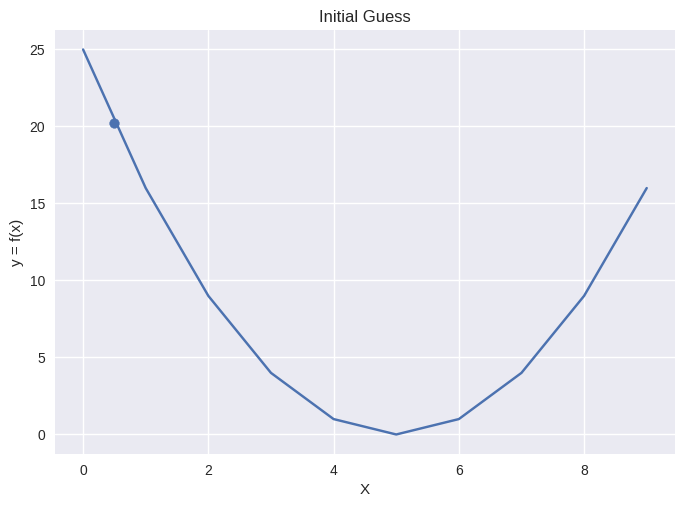

In [ ]:
x = 0.5

y = (x-5)**2
plt.plot(X,Y)

plt.scatter(x,y)

plt.xlabel("X")
plt.ylabel("y = f(x)")
plt.title("Initial Guess")
plt.show()

This code initializes X to be 0.5 and demonstrates the effect of gradient descent on the cost function over a small number of iterations. You can observe how the algorithm updates X and the corresponding values of the cost function. Adjust the learning_rate variable to see the impact on convergence.

#### Gradient Descent Visualization - Without Learning Rate

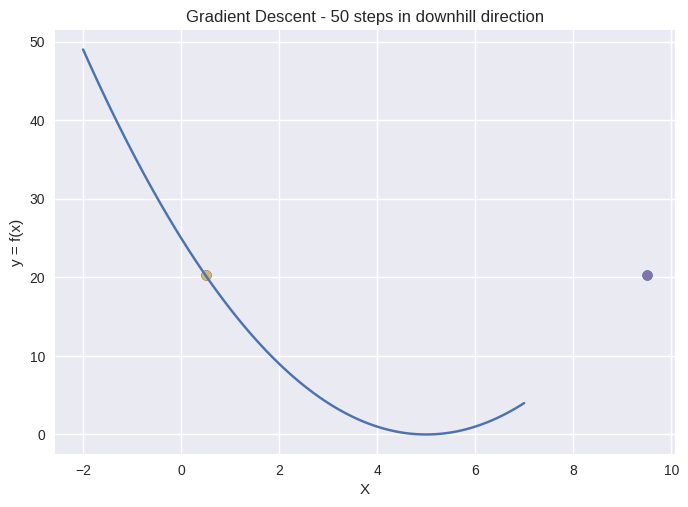

In [ ]:
# In this we are initializing x to 0.5, representing the starting point on the cost function.
# It iterates 10 times, updating x directly using the gradient of the cost function (grad = 2 * (x - 5)).
# The code plots the cost function and the points where each update occurs.

import time

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

x = 0.5

y = (x-5)**2
plt.plot(X,Y)
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("y = f(x)")
plt.title("Gradient Descent - 50 steps in downhill direction")
# plt.show()

lr = 0.1 # not using learning rate in this part -> this is without learning rate gradient
errors = []

for i in range(10):
  grad = 2*(x-5)
  x = x- grad
  y = (x-5)**2
  error = y - 0
  errors.append(error)
  plt.scatter(x, y)
  fig.canvas.draw()
  time.sleep(0.5)
plt.show()


The above code shows a rapid decrease in the cost function values but exhibits a large jump between consecutive iterations.

#### Gradient Descent Visualization - With Learning Rate

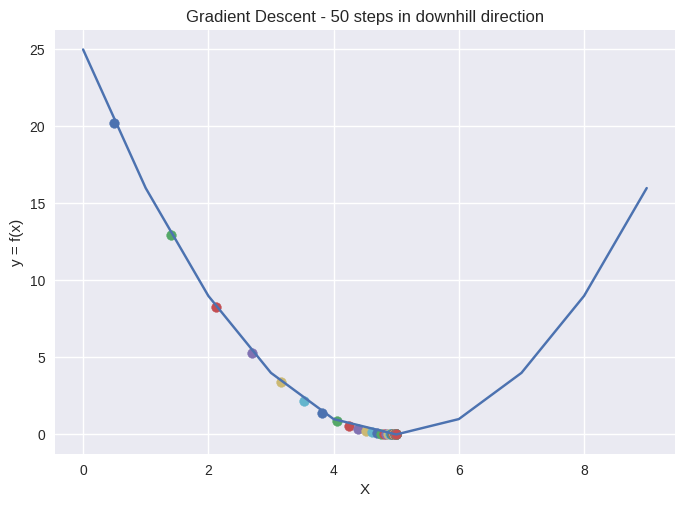

In [ ]:
# Similar to the above code, we are initializing x to 0.5.
# It iterates 50 times, but this time updates x using the learning rate (lr) multiplied by the gradient (grad).
# The learning rate controls the step size in the downhill direction.

import time

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

x = 0.5

y = (x-5)**2
plt.plot(X,Y)
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("y = f(x)")
plt.title("Gradient Descent - 50 steps in downhill direction")
# plt.show()

lr = 0.1
errors = []

for i in range(50):
  grad = 2*(x-5)
  x = x- lr*grad
  y = (x-5)**2
  error = y - 0
  errors.append(error)
  plt.scatter(x, y)
  fig.canvas.draw()
  time.sleep(0.5)
plt.show()


The code shows a smoother descent with smaller steps, allowing the algorithm to approach the minimum point more gradually.

The key difference is the introduction of the learning rate in the code with learning rate, which helps control the step size during each iteration.

The codew without learning rate updates x directly without considering the impact of the step size, leading to larger jumps.

The code with the learning rate results in a smoother convergence, preventing overshooting and allowing the algorithm to reach the minimum point more effectively.

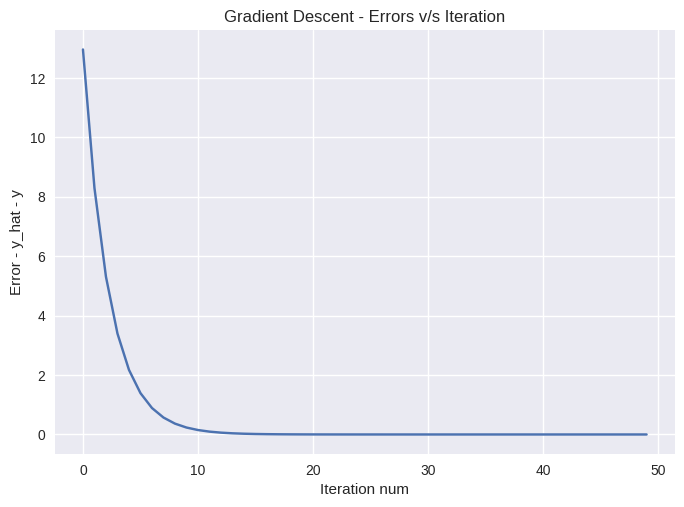

In [ ]:
plt.plot(errors)
plt.xlabel("Iteration num")
plt.ylabel("Error - y_hat - y")
plt.title("Gradient Descent - Errors v/s Iteration")
plt.show()

**when to stop gradient descent iterations is crucial:**

Gradient descent is an iterative optimization algorithm used to minimize a cost or loss function iteratively. Deciding when to halt these iterations is a critical aspect of the process. If the algorithm stops too early, it may not reach the optimal solution, and if it continues for too long, it might waste computational resources.

**A fixed number of iterations is often set (e.g., 50):**

One common approach is to predefine a fixed number of iterations. In practice, this number is a hyperparameter that can be adjusted based on experience or computational constraints. For example, setting the number of iterations to 50 means the algorithm will perform 50 updates to the model parameters.

**Early stopping conditions are essential for efficiency:**

While fixing the number of iterations is a straightforward strategy, it may not always be the most efficient. Early stopping conditions are introduced to dynamically halt the iterations based on the current state of the optimization. These conditions are designed to recognize when the algorithm has reached a satisfactory solution, making further iterations unnecessary.

Common early stopping conditions include:

**Convergence Criteria:** Monitoring the change in the cost function or model parameters. If the change falls below a predefined threshold, the algorithm can stop.

**Validation Set Performance:** Assessing the model's performance on a separate validation set. If the performance ceases to improve or starts degrading, the algorithm can be stopped.

**Maximum Iterations:** A safety net to prevent excessively long computations. If the algorithm hasn't converged by a certain predefined number of iterations, it halts to prevent prolonged execution.

Determining when to stop gradient descent involves finding a balance between computational efficiency and achieving optimal results. A fixed number of iterations provides a baseline, but incorporating early stopping conditions ensures adaptability and prevents unnecessary computations.

## Use Case Simulation

**Linear Regression Model Development Steps:**
<ul>
  <li>Develop a univariate linear regression model to predict the selling price based on the input variable, max power.</li>
  <li>Define three functions: linear hypothesis, gradient computation, and error computation.</li>
  <li>Implement gradient descent to optimize the model parameters (Theta 0 and Theta 1).</li>
  <li>Stopped gradient descent after a fixed number of iterations (e.g., 50).</li>
  <li>Explain the importance of early stopping conditions for efficiency.</li>
</ul>

In [ ]:
X = df["max_power"]
Y = df["selling_price"]

# Normalisation -> standard Normalisation
u = X.mean()
std = X.std()

X = (X-u)/std

Normalization, particularly standard normalization (subtracting mean and dividing by standard deviation), is often used to make computation feasible.

Dealing with smaller numbers helps in handling large differences in magnitudes between input variables, leading to better performance during gradient descent.

### Linear Regression Hypothesis Function

In [ ]:
def hypothesis(x, theta):
    # Linear hypothesis function: h(x) = theta[0] + theta[1]*x
    y_hat = theta[0] + theta[1]*x
    return y_hat

### Gradient Computation for Linear Regression

In [ ]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))  # Initializing gradient vector with zeros for Theta 0 and Theta 1

    for i in range(m):
        x = X[i]  # Current input
        y_hat = hypothesis(x, theta)  # Computing hypothesis for the current input
        y = Y[i]  # Actual output

        # Updating gradients for Theta 0 and Theta 1
        grad[0] += (y_hat - y)  # Partial derivative of cost with respect to Theta 0
        grad[1] += (y_hat - y)*x  # Partial derivative of cost with respect to Theta 1

    return grad/m  # Average gradient over all examples

**grad[0]:**

![picture](https://drive.google.com/uc?export=view&id=173OcWqhp3pEohyJBoOcMaiLffvfToBqw)

**grad[1]:**

![picture](https://drive.google.com/uc?export=view&id=1dWqo7troQTRR-U_V1Mghy5f01W_RpOYs)

These derivatives are computed within the gradient function and are fundamental for updating the parameters during the gradient descent process. They capture the sensitivity of the cost function to changes in Theta 0 and Theta 1

### Error Calculation for Linear Regression

In [ ]:
def error(X, Y, theta):
    m = X.shape[0]  # Number of examples in the dataset
    total_error = 0.0  # Initialize the total error

    for i in range(m):
        x = X[i]  # Current input
        y_hat = hypothesis(x, theta)  # Compute hypothesis for the current input
        y = Y[i]  # Actual output

        # Compute the squared error for the current example
        error_i = (y_hat - y)**2
        total_error += error_i  # Accumulate the squared error

    return (total_error/m)  # Return the mean squared error

### Gradient Descent Optimization for Linear Regression

In [ ]:
def gradient_descent(X, Y, max_steps=100, learning_rate=0.1):
    theta = np.zeros((2,))  # Initialize weights Theta 0 and Theta 1 to zero
    error_list = []  # List to store errors during iterations
    theta_list = []  # List to store Theta values during updates

    for i in range(max_steps):
        # Compute gradient using the gradient function
        grad = gradient(X, Y, theta)

        # Compute error using the error function
        e = error(X, Y, theta)

        # Update weights Theta 0 and Theta 1 using the learning rate and gradients
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

        # Store the updated Theta values during each iteration
        theta_list.append((theta[0], theta[1]))
        # Store the error during each iteration
        error_list.append(e)

    return theta, error_list, theta_list

In [ ]:
theta, error_list, theta_list = gradient_descent(X, Y, max_steps=50)
print(theta)

[10.36629766  0.37994268]


theta0 = 10.36629766
theta1 = 0.37994268

Y = theta0 + theta1.X

Here, X is normalised

### Animate Visualization of Linear Regression Training

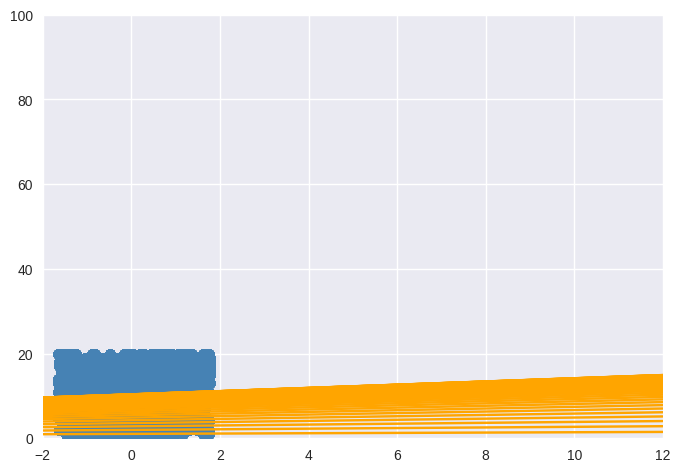

In [ ]:
# Import necessary libraries
import time
import numpy as np
import matplotlib.pyplot as plt

# Initialize the figure and subplot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()  # Enable interactive mode for animation

# Iterate through the optimized model parameters
for intercept, slope in theta_list:
    # Set the x-axis and y-axis limits for better visualization
    ax.set_xlim([-2, 12])
    ax.set_ylim([0, 100])

    # Generate x values for the regression line
    x_vals = np.array(ax.get_xlim())  # Fix: call ax.get_xlim() and convert to np.array
    y_vals = intercept + slope * x_vals

    # Plot the original data points in steel blue
    ax.scatter(X, Y, color='steelblue')

    # Plot the regression line in orange
    ax.plot(x_vals, y_vals, color='orange')

    # Update the plot in the animation
    fig.canvas.draw()

    # Add a delay for better visualization
    time.sleep(0.5)

# Display the final plot
plt.show()

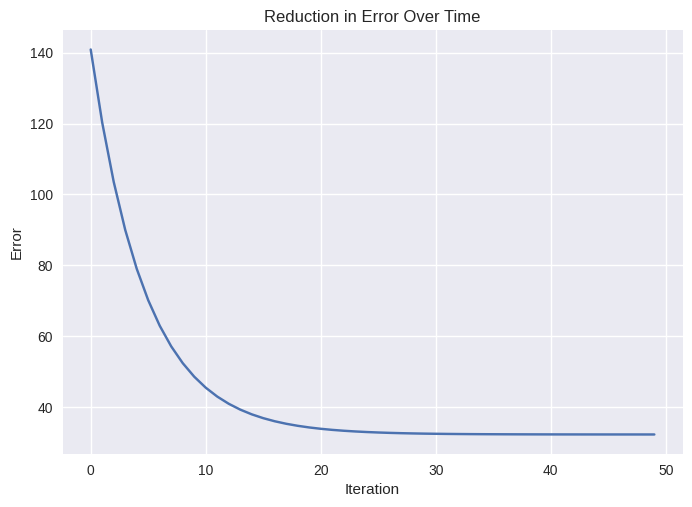

In [ ]:
# Initialize a new figure for the plot
fig = plt.figure()

# Plot the error values over iterations
plt.plot(error_list)

# Set the title and axis labels for better interpretation
plt.title('Reduction in Error Over Time')
plt.xlabel('Iteration')
plt.ylabel('Error')

# Display the plot
plt.show()

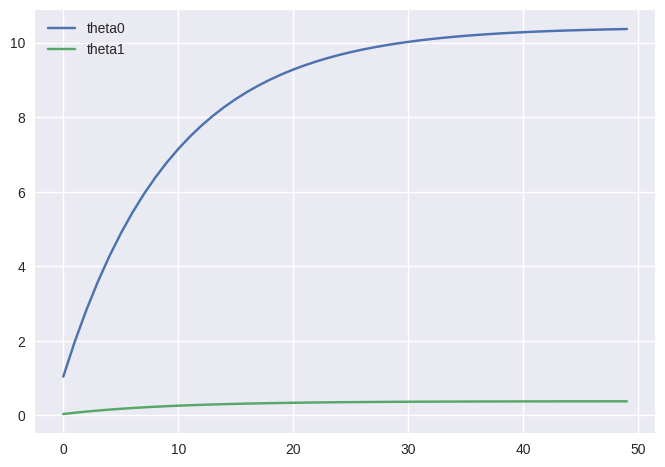

In [ ]:
# Initialize a new figure for the plot
fig = plt.figure()

# Extract Theta 0 and Theta 1 values from the 'theta_list'
theta_list = np.array(theta_list)

# Plot the changes in Theta 0 and Theta 1 over iterations
plt.plot(theta_list[:, 0], label="theta0")
plt.plot(theta_list[:, 1], label="theta1")

# Add a legend for better interpretation
plt.legend()

# Display the plot
plt.show()

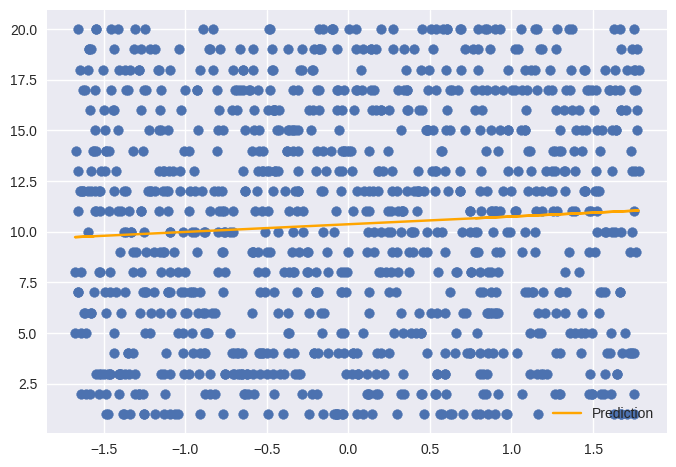

In [ ]:
# Initialize a new figure for the plot
fig = plt.figure()

# Compute predicted values using the trained model parameters
Y_hat = hypothesis(X, theta)

# Scatter plot of the original data points
plt.scatter(X, Y)

# Plot the regression line representing the model's predictions in orange
plt.plot(X, Y_hat, color='orange', label='Prediction')

# Add a legend for better interpretation
plt.legend()

# Display the plot
plt.show()

## Metrics for Evaluating Regression Models

<ol>
  <li>Accuracy (for Classification Problems):</li>
<ul>
  <li>In machine learning, classification is a type of task where the goal is to assign predefined labels or categories to input data points. Accuracy is a commonly used metric to evaluate the performance of a classification model.</li>
  <li>Accuracy measures how many predictions made by the model are correct out of the total number of predictions.</li>
  <li>The formula for accuracy is expressed as:

Accuracy =Total Number of Predictions/Number of Correct Predictions

</li>
</ul>

  <li>Error Metrics for Regression:</li>
<ul>
  <li>Mean Absolute Error (MAE): Average of absolute differences between predicted and actual values.</li>
  <li>Mean Squared Error (MSE): Average of squared differences between predicted and actual values.</li>
  <li>Root Mean Squared Error (RMSE): Square root of MSE, brings the error to the original scale.</li>
  <li>Mean Absolute Percentage Error (MAPE): Average of absolute percentage differences between predicted and actual values.</li>
</ul>

  <li>R Square:</li>
<ul>
  <li>R Square (R²) or Coefficient of Determination.</li>
  <li>Measures the amount of variance in the dependent variable (y) explained by the independent variable (X)</li>
  <li>Formula:
  
  R<sup>2</sup> = 1 - (SSR/TSS)

  SSR is the Residual Sum of Squares.

  TSS is the Total Sum of Squares.
  </li>
  <li>R Square varies from 0 to 1.</li>
  <li>Closer to 1 indicates a good model, closer to 0 is less ideal.</li>
  <li>Can theoretically take values between -1 to 1, but practically between 0 to 1.</li>
</ul>

<ul>
  <li>R Square tells how well the model explains the variability in y using the variation in X.</li>
<ul>
  <li>Ideal model: R² = 1 (perfect predictions).</li>
  <li>Poor model: R² = 0 (no explanatory power).</li>
  <li>Negative R² (rare) indicates an inverted relationship.</li>
</ul>
</ul>

<ul>
  <li>R square is calculated as:

1 - Total Sum of Squares/Residual Sum of Squares

Residual sum of squares is the sum of squared differences between actual (Y) and predicted (Y_hat) values.

Total sum of squares involves squared differences between actual (Y) values and their mean.
</li>

</ul>
</ol>

### R-squared Score Calculation

In [ ]:
import numpy as np

def r2_score(Y, Y_hat):
    # Calculate the sum of squared differences between actual and predicted values
    num = np.sum((Y - Y_hat)**2)

    # Calculate the sum of squared differences between actual values and their mean
    denom = np.sum((Y - np.mean(Y))**2)

    # Compute the R-squared score
    score = 1 - num / denom

    return score

In [ ]:
r2_score(Y, Y_hat)

0.0044138580913082315

## 3D Visualization of Cost Function

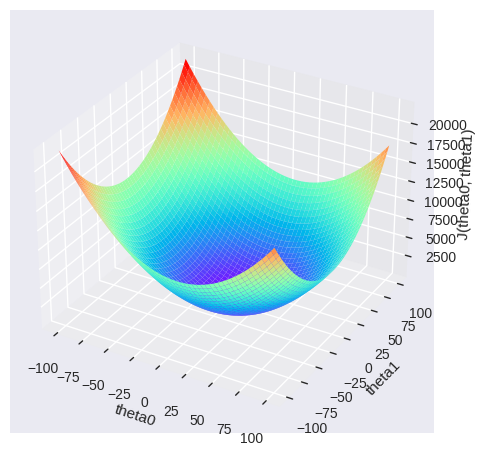

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a range of values for Theta 0 and Theta 1
T0 = np.arange(-100, 100, 1)
T1 = np.arange(-100, 100, 1)

# Create a meshgrid of Theta 0 and Theta 1 values
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

# Calculate the cost (J) for each combination of Theta 0 and Theta 1
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        Y_hat = T1[i, j] * X + T0[i, j]
        J[i, j] = np.sum(((Y - Y_hat) ** 2) / Y.shape[0])

# Create a 3D plot of the cost function
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')

# Label the axes for better interpretation
axes.set_xlabel("theta0")
axes.set_ylabel("theta1")
axes.set_zlabel("J(theta0, theta1)")

# Display the 3D plot
plt.show()

## Stochastic Gradient Descent (SGD):

<ul>
  <li>Stochastic Gradient Descent is a variation of Gradient Descent that updates the weights for each individual training observation.</li>
  <li>Rather than waiting for the entire dataset to complete one iteration, it updates the weights "on the fly" as each observation is processed.</li>
  <li>This approach introduces a level of randomness due to the continuous updates based on individual examples.</li>
  <li>Advantages of SGD:</li>
<ul>
  <li>Faster Convergence: Since updates are made more frequently, the algorithm can converge faster, especially in scenarios where the cost function has many local minima.</li>
  <li>Suitability for Large Datasets: It is computationally less intensive as it processes one observation at a time, making it suitable for large datasets.</li>
</ul>
</ul>

tochastic Gradient Descent is an optimization algorithm that updates model parameters for each observation, providing faster convergence and suitability for large datasets. Its randomness introduces exploration in the optimization process, making it a powerful approach, especially in the context of deep learning.

## Mini-Batch Gradient Descent:

<ul>
  <li>Mini-Batch Gradient Descent is a compromise between Batch Gradient Descent and Stochastic Gradient Descent (SGD).</li>
  <li>It combines the efficiency of batch updates and the computational advantages of stochastic updates.</li>
  <li>The size of the batch is a hyperparameter that can be chosen based on computational resources and dataset characteristics (common choices include 32, 64, or 128 observations).</li>
  <li>Advantages of Mini-Batch GD:</li>
<ul>
  <li>Efficient Computation: Processing a batch of observations is computationally more efficient than the entire dataset (Batch GD).</li>
  <li>Reduced Variance: Compared to SGD, which updates weights after each observation, Mini-Batch GD reduces the variance in weight updates by considering a batch of observations.</li>
  <li>Parallelization: Mini-Batch GD can be parallelized more effectively than Batch GD, making it suitable for implementation on hardware with parallel processing capabilities (e.g., GPUs).</li>
</ul>
</ul>

Mini-Batch Gradient Descent is a widely used optimization technique in deep learning. It strikes a balance between the computational efficiency of Batch GD and the stability of Stochastic GD, making it well-suited for training large neural networks on substantial datasets. Its relevance extends to the foundation of various advanced optimization algorithms used in modern deep learning practices.

## Linear Regression using Scikit-Learn

In [ ]:
# The linear_model module in Scikit-Learn provides an implementation of linear regression.
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating an instance of the linear regression model.
model = LinearRegression()

In [ ]:
import pandas as pd

# Assuming X and Y are Pandas Series
X = pd.Series(X)
Y = pd.Series(Y)

# Convert to NumPy array and reshape
X = X.values.reshape(X.size, 1)
Y = Y.values.reshape(Y.size, 1)

In [ ]:
print(X.shape)
print(Y.shape)

(1000, 1)
(1000, 1)


In [ ]:
# Use the fit method to train the model. This step involves passing the input features (X) and the target variable (Y).
model.fit(X, Y)

LinearRegression()

In [ ]:
# After training, we can access the intercept and coefficients of the linear regression model.
model.intercept_

array([10.42])

In [ ]:
model.coef_

array([[0.38192198]])

In [ ]:
# Scikit-Learn provides a score method to calculate the coefficient of determination (R²) of the prediction.
model.score(X,Y)

0.0045031006901405934

In [ ]:
# To make predictions using the trained model, use the predict method.
output = model.predict(X)

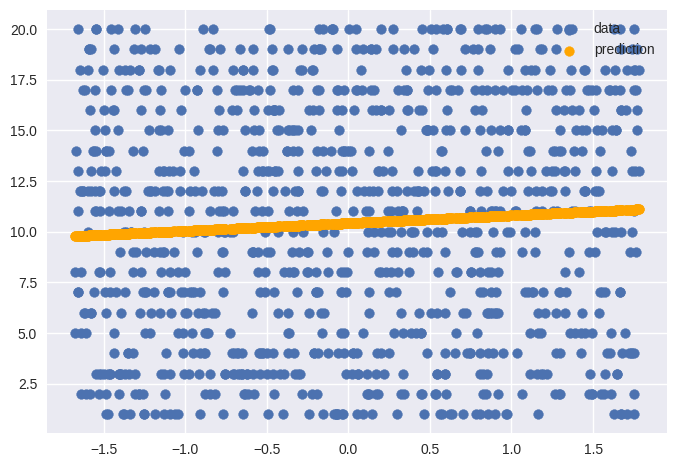

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Initialize a new figure for the plot
fig = plt.figure()

# Scatter plot of the original data points in blue
plt.scatter(X, Y, label='data')

# Scatter plot of the model predictions in orange
plt.scatter(X, output, color='orange', label='prediction')

# Add a legend for better interpretation
plt.legend()

# Display the plot
plt.show()